# Prosper Loan Exploration
## by James Franchino

## Investigation Overview


In this investigation I wanted to investigate two main things:

- What metrics can be used to predict credit defaults? 

- Does the loan term have an effect on default?


## Dataset Overview

This data set contains 113937 rows, with 81 columns containing information about loans made through Prosper, a peer-to-peer lending platform.  For the purpose of this analysis, I'm using the following columns: 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations', 'Investors'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
columns_keep =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [4]:
new_df = df[columns_keep]

In [5]:
new_df = new_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [6]:
new_df['LoanOriginationDate'] = pd.to_datetime(new_df['LoanOriginationDate'])

In [7]:
new_df['TotalProsperLoans'] = new_df['TotalProsperLoans'].fillna(0)

## Loan status

First we need to look at the status of the loans in our dataset. What this graph tells us is:

- Most of the loans are current, not late or in default, and not completed (paid off).

- Completed loans are our second biggest category.

- Past due loans are split into several categories based on the amount of days past due.

In [8]:
base_color = sb.color_palette()[0];
sb.set_style('darkgrid');

In [9]:
def MyCountPlot(df, xVar, hue=None, color=0, palette=None, order=None, hue_order=None):
    '''
    Inputs: data, variable. hue, color, palette, order and hue_order are optional
    
    Output: A countplot
    '''
    
    # set plot dimensions
    plt.figure(figsize=[14, 6])
    
    # plot
    sb.countplot(data=new_df, x=xVar, hue=hue, color=sb.color_palette()[color], palette=palette, order=order, edgecolor='black', linewidth=2, hue_order=hue_order)
    
    # clean up variable names
    xVar=xVar.replace("_", " ") # replaces _ with a space
    if hue:
        hue=hue.replace("_", " ")
    
    # add title and format it
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(), fontsize=14, weight="bold")
    
    # add xlabel and format it
    plt.xlabel(xVar.title(), fontsize=10, weight="bold")
    
    # add ylabel and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight="bold")

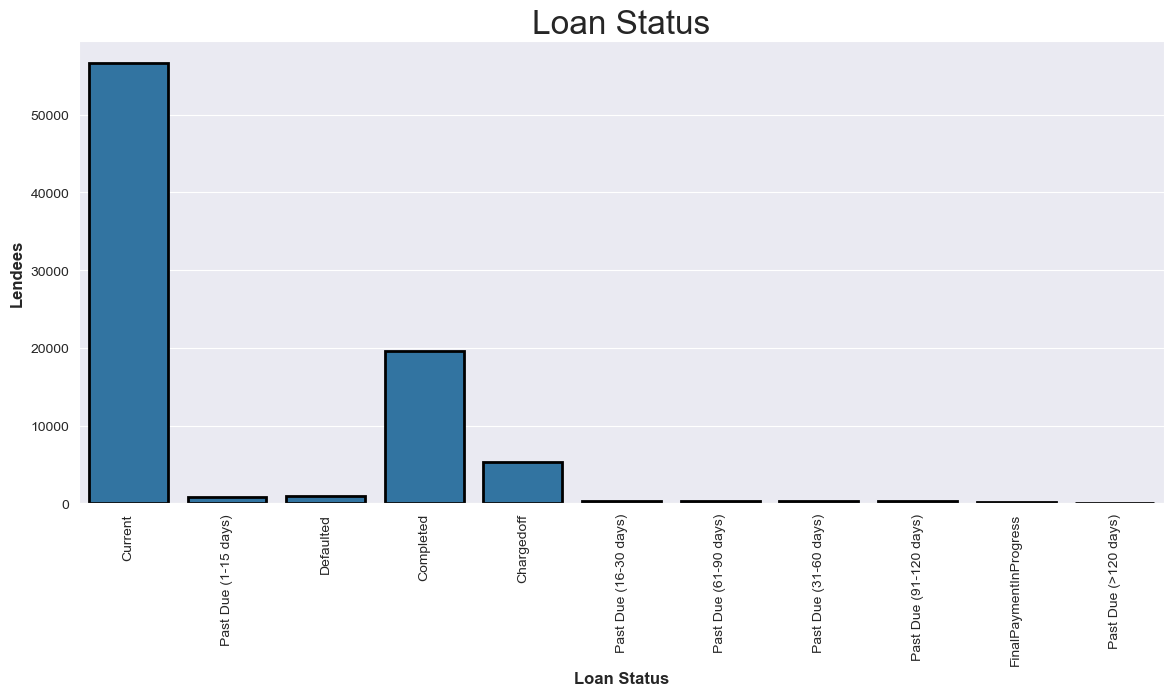

In [10]:
MyCountPlot(new_df, 'LoanStatus')

plt.xticks(rotation=90);

plt.title( "Loan Status" , size = 24 );
plt.xlabel( "Loan Status" , size = 12 );
plt.ylabel( "Lendees" , size = 12 );

In [11]:
income_standard = new_df['StatedMonthlyIncome'].std()
income_mean = new_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_standard * 3
len(new_df[new_df['StatedMonthlyIncome'] >= boundary])

245

## Stated Monthly Income

Next we will look at the stated monthly income of all lendees. From this graph what we've learned is:

- We can see that the majority of lendees land around $5000 in monthly income.

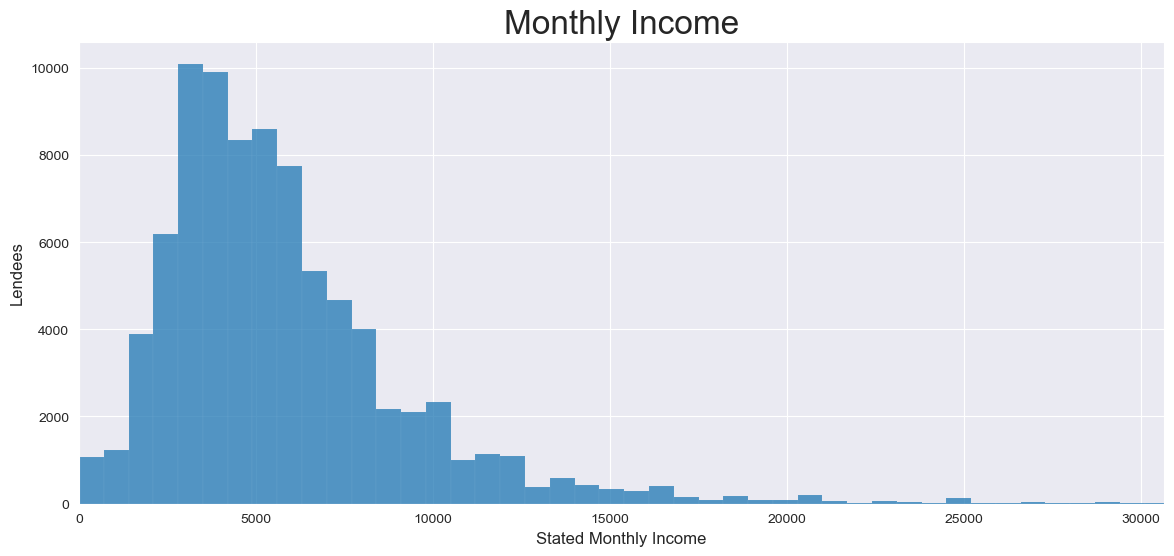

In [14]:
plt.figure(figsize=[14, 6])
sb.histplot(data=new_df, x='StatedMonthlyIncome', bins = 2500);
plt.xlim(0, boundary);
plt.title( "Monthly Income" , size = 24 );
plt.xlabel( "Stated Monthly Income" , size = 12 );
plt.ylabel( "Lendees" , size = 12 );

## Term Lengths

Let's take a look at term lengths next. As we can see in the below graph, 36 month (3 year) loans are by far the most popular loans given through Prosper. 

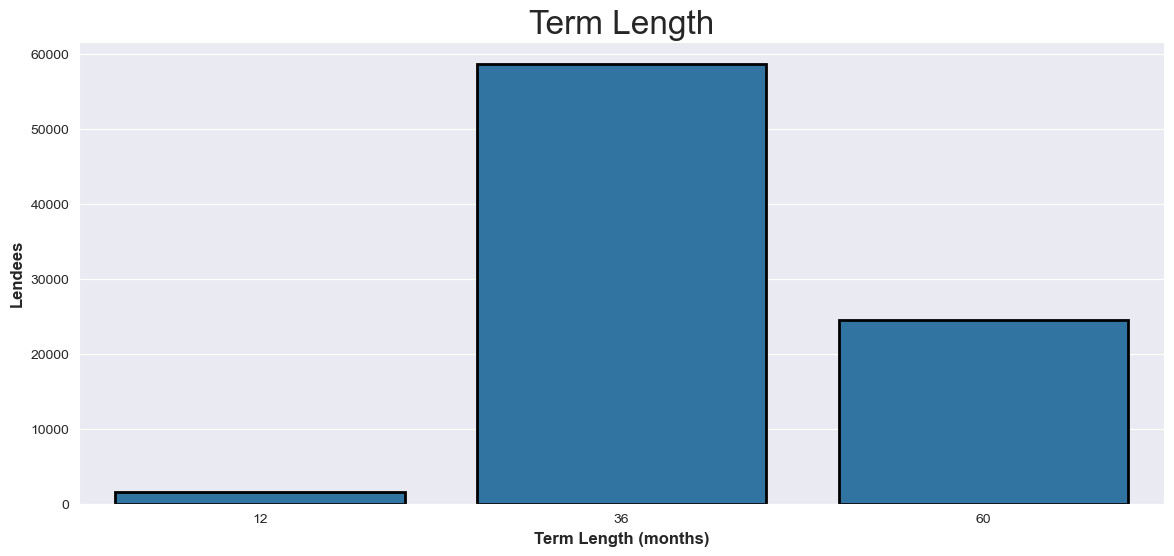

In [15]:
MyCountPlot(new_df, 'Term');

plt.title( "Term Length" , size = 24 );
plt.xlabel( "Term Length (months)" , size = 12 );
plt.ylabel( "Lendees" , size = 12 );

In [16]:
# Transforming the 'LoanStatus' Column
# Selecting the categories

new_df = new_df.query('LoanStatus in ["Completed", "Chargedoff", "Defaulted"]').copy()

# np.where(condition[, x, y]) When True, yield x, otherwise yield y

new_df['LoanStatus'] = np.where(new_df['LoanStatus'] == 'Chargedoff', 'Defaulted', new_df['LoanStatus'])

# Check

new_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

In [17]:
# Reducing the number of categories

categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}

# Use .map() to map categories and fill NaN with 'Other'
    
new_df['ListingCategory (numeric)'] = new_df['ListingCategory (numeric)'].map(categories).fillna('Other')   
    
# Check
new_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

## Prosper rating vs loan length

Now let's look at Prosper credit ratings and if that has an impact on the length of the loans. 

- The amount of 12 month term loans is nearly uniform with the exception of the HR category

- 36 month term loans have the highest amount of loans in the HR category

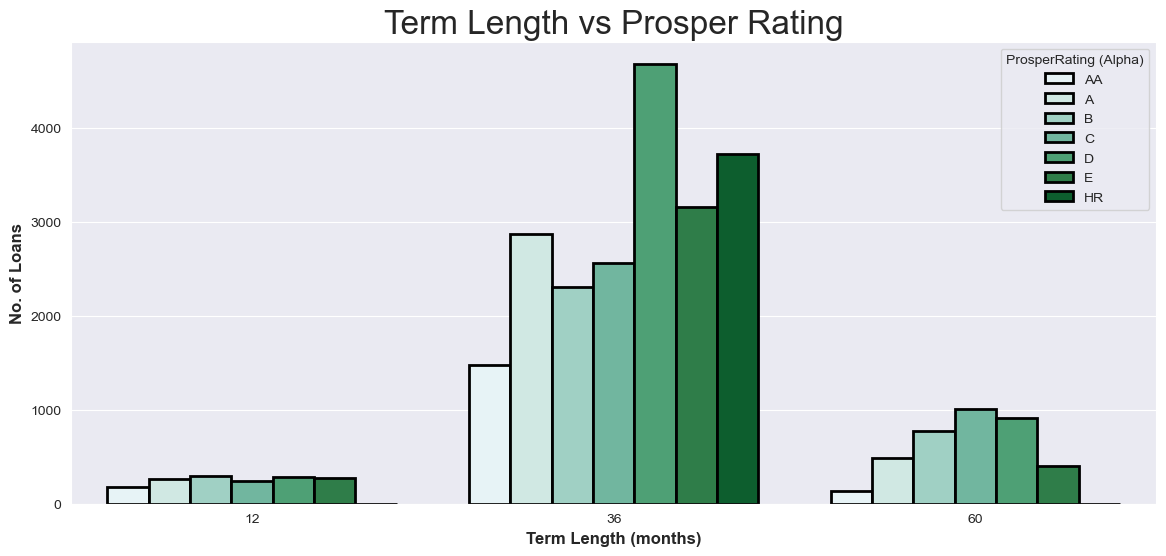

In [19]:
credit_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

MyCountPlot(new_df, 'Term', hue = 'ProsperRating (Alpha)', hue_order = credit_rating, palette = 'BuGn');

plt.title( "Term Length vs Prosper Rating" , size = 24 );
plt.xlabel( "Term Length (months)" , size = 12 );
plt.ylabel( "No. of Loans" , size = 12 );

## Rating, loan amount, loan status

When looking at the Prosper Rating, amount of the loan and status of the loan we learn that:

- Except for the HR rating, defaulted loans are larger than completed loans.

- Most of the defaulted loans come from individuals with a low Prosper rating.

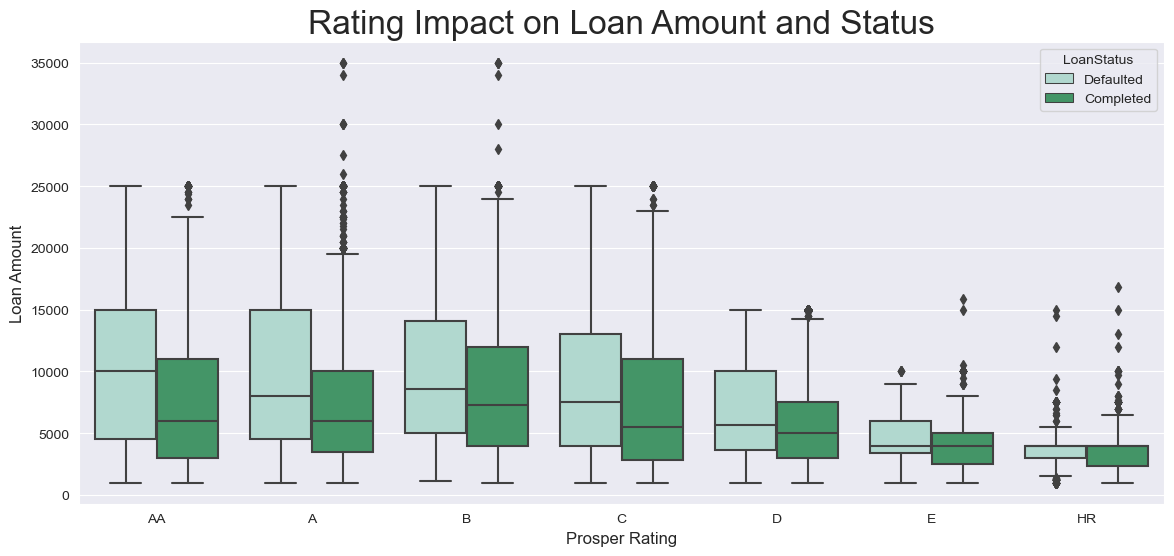

In [20]:
plt.figure(figsize = [14, 6])
sb.boxplot(data = new_df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'LoanStatus', order = credit_rating, palette = 'BuGn');

plt.title( "Rating Impact on Loan Amount and Status" , size = 24 );
plt.xlabel( "Prosper Rating" , size = 12 );
plt.ylabel( "Loan Amount" , size = 12 );

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 801004 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
404 GET /favicon.ico (127.0.0.1) 0.90ms
